In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geoplot
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

In [2]:
# List of all .csv files with shipwreck sites
datasets = glob.glob("./data/sites/*.csv")

# First combine all datasets into a singular DataFrame
df = pd.concat(map(lambda p: pd.read_csv(p), datasets), ignore_index=False)

# drop duplicate entries
df.drop_duplicates(inplace=True)




In [12]:
gpd.list_layers('data/Wards_December_1998_Boundaries_SC_BFE_591650221333039804/WD_DEC_1998_SC_BFE_V2.shp')

,name,geometry_type
0,WD_DEC_1998_SC_BFE_V2,Polygon


<Axes: >

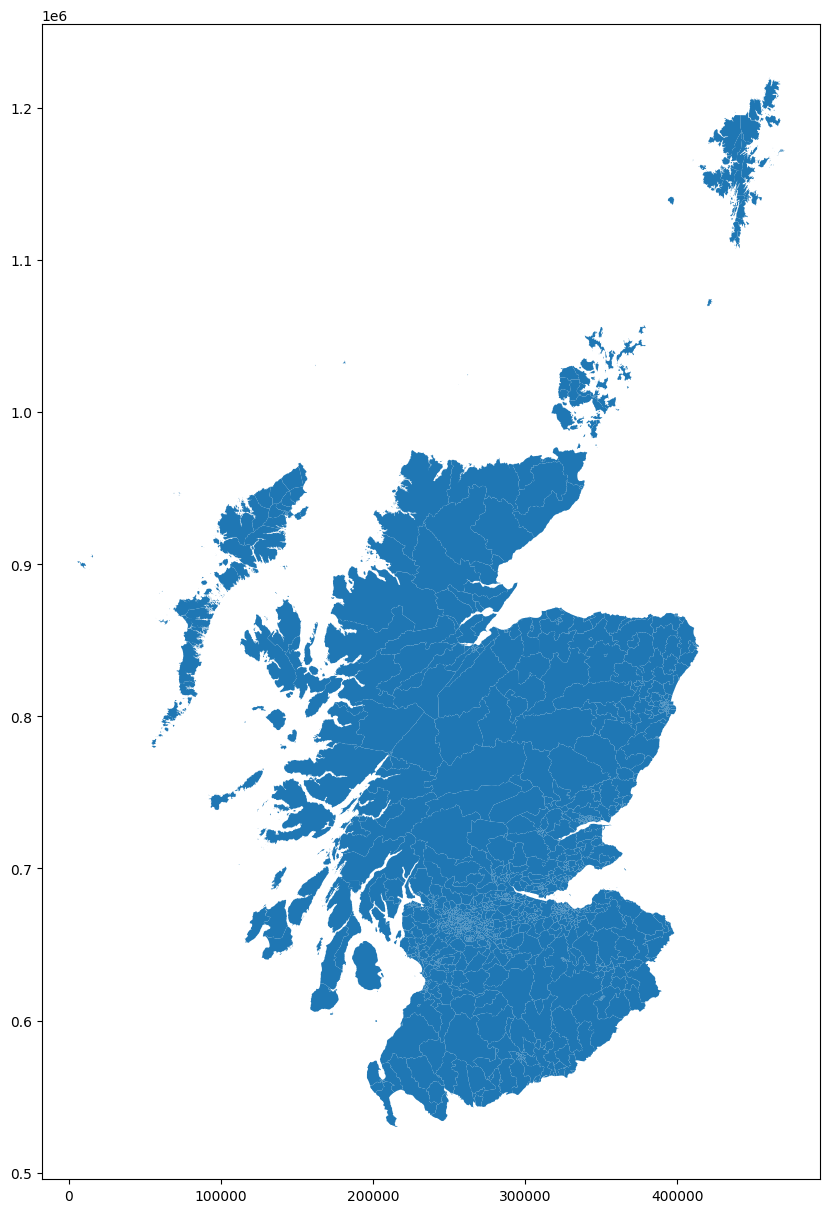

In [3]:
map_scotland = gpd.read_file('data/Wards_December_1998_Boundaries_SC_BFE_591650221333039804/WD_DEC_1998_SC_BFE_V2.shp')

fig, ax = plt.subplots(figsize=(15, 15))
map_scotland.plot(ax=ax)

In [14]:
# Show coordinates of the map
map_scotland.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [77]:
df

,CANMORE ID,SITE NUMBER,SITE NAME,SITE TYPE,SITE EASTING,SITE NORTHING,COUNCIL,COUNTY,PARISH,NGR,URL,Unnamed: 11
0,102076,NT79SE 8005,U-12: Firth Of Forth,Submarine (20th Century),379000.0,691000.0,EAST LOTHIAN,NOT APPLICABLE,MARITIME - EAST LOTHIAN,NT 79 91,http://canmore.org.uk/site/102076,NaN
1,102078,NT48NW 8001,Lca 845: Firth Of Forth,"Landing Craft (20th Century), Obstruction (20t...",344836.0,689018.0,EAST LOTHIAN,NOT APPLICABLE,MARITIME - EAST LOTHIAN,NT 44836 89018,http://canmore.org.uk/site/102078,NaN
2,102081,NT48NE 8001,Chester: Firth Of Forth,"Requisitioned Steam Trawler (20th Century), St...",345793.0,686811.0,EAST LOTHIAN,NOT APPLICABLE,MARITIME - EAST LOTHIAN,NT 45793 86811,http://canmore.org.uk/site/102081,NaN
3,102083,NT48NW 8004,"G4: Gullane Point, Firth Of Forth",Barge (20th Century),342907.0,688240.0,EAST LOTHIAN,NOT APPLICABLE,MARITIME - EAST LOTHIAN,NT 42907 88240,http://canmore.org.uk/site/102083,NaN
4,102084,NT68SE 8002,"Hiram: Hedderwick Sands, Firth Of Forth","Barquentine (20th Century), Obstruction (20th ...",365731.0,682401.0,EAST LOTHIAN,NOT APPLICABLE,MARITIME - EAST LOTHIAN,NT 65731 82401,http://canmore.org.uk/site/102084,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
228,220436,NS12NW 8002,Hms Ulysses: Firth Of Clyde,Destroyer (20th Century),210000.0,627000.0,NORTH AYRSHIRE,NOT APPLICABLE,MARITIME - NORTH AYRSHIRE,NS 10 27,http://canmore.org.uk/site/220436,NaN
229,220437,NS33NW 8022,"Campbeltown: Irvine Harbour Entrance, Firth Of...",Schooner (20th Century),230300.0,638000.0,NORTH AYRSHIRE,NOT APPLICABLE,MARITIME - NORTH AYRSHIRE,NS 303 380,http://canmore.org.uk/site/220437,NaN
230,220440,NS33NW 8023,"Kate: Irvine Bay, Firth Of Clyde",Auxiliary Schooner (20th Century),230300.0,637800.0,NORTH AYRSHIRE,NOT APPLICABLE,MARITIME - NORTH AYRSHIRE,NS 303 378,http://canmore.org.uk/site/220440,NaN
231,220441,NS01NW 8016,Hamilton: Firth Of Clyde,Steamship (20th Century),204000.0,617000.0,NORTH AYRSHIRE,NOT APPLICABLE,MARITIME - NORTH AYRSHIRE,NS 04 17,http://canmore.org.uk/site/220441,NaN


In [10]:
errors = []
geometry = []
# Create points for all coordinates in the dataframe and list the first three
for xy in zip(df["SITE EASTING"], df["SITE NORTHING"]):

    try:
        geometry.append(Point(xy))
    except:
        errors.append(xy)
geometry[:3]

[<POINT (379000 691000)>, <POINT (344836 689018)>, <POINT (345793 686811)>]

In [16]:
df.to_csv('data/sites/allcombined.csv', index=False)

In [12]:
geo_df = gpd.GeoDataFrame(df,  geometry=geometry)
geo_df.head()

,CANMORE ID,SITE NUMBER,SITE NAME,SITE TYPE,SITE EASTING,SITE NORTHING,COUNCIL,COUNTY,PARISH,NGR,URL,Unnamed: 11,geometry
0,102076,NT79SE 8005,U-12: Firth Of Forth,Submarine (20th Century),379000.0,691000.0,EAST LOTHIAN,NOT APPLICABLE,MARITIME - EAST LOTHIAN,NT 79 91,http://canmore.org.uk/site/102076,NaN,POINT (379000 691000)
1,102078,NT48NW 8001,Lca 845: Firth Of Forth,"Landing Craft (20th Century), Obstruction (20t...",344836.0,689018.0,EAST LOTHIAN,NOT APPLICABLE,MARITIME - EAST LOTHIAN,NT 44836 89018,http://canmore.org.uk/site/102078,NaN,POINT (344836 689018)
2,102081,NT48NE 8001,Chester: Firth Of Forth,"Requisitioned Steam Trawler (20th Century), St...",345793.0,686811.0,EAST LOTHIAN,NOT APPLICABLE,MARITIME - EAST LOTHIAN,NT 45793 86811,http://canmore.org.uk/site/102081,NaN,POINT (345793 686811)
3,102083,NT48NW 8004,"G4: Gullane Point, Firth Of Forth",Barge (20th Century),342907.0,688240.0,EAST LOTHIAN,NOT APPLICABLE,MARITIME - EAST LOTHIAN,NT 42907 88240,http://canmore.org.uk/site/102083,NaN,POINT (342907 688240)
4,102084,NT68SE 8002,"Hiram: Hedderwick Sands, Firth Of Forth","Barquentine (20th Century), Obstruction (20th ...",365731.0,682401.0,EAST LOTHIAN,NOT APPLICABLE,MARITIME - EAST LOTHIAN,NT 65731 82401,http://canmore.org.uk/site/102084,NaN,POINT (365731 682401)


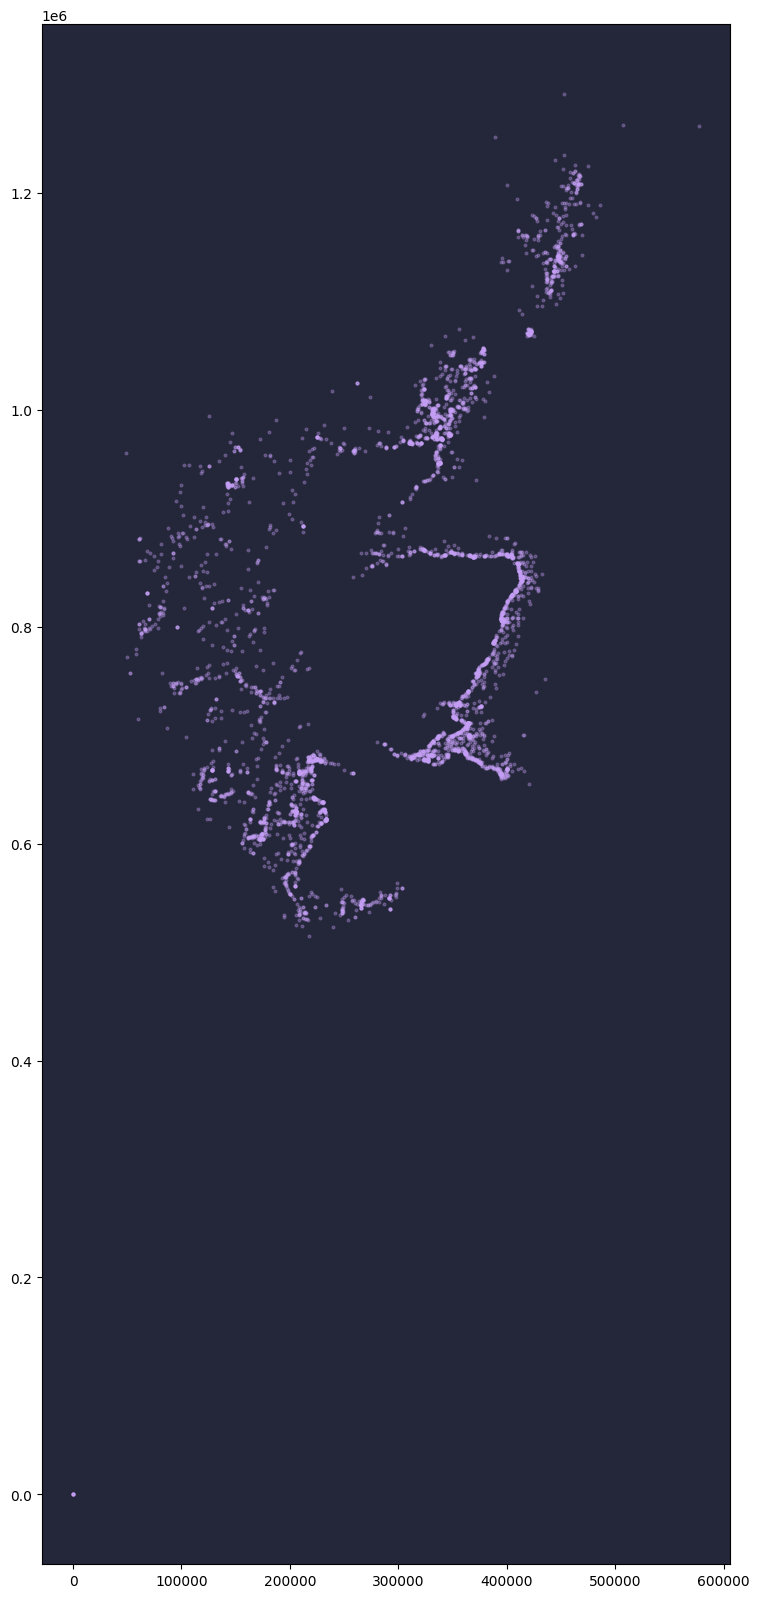

In [27]:
fig, ax = plt.subplots(figsize=(20,20))
ax.set_facecolor('#24273a')
map_scotland.plot(ax=ax, alpha=0, color='#6e738d')

geo_df.plot(ax=ax, markersize=15, color='#c6a0f6', marker='.',  alpha=0.3, label='shipwreck')

plt.savefig('wrecks_of_Scotland.png', dpi=600)